__Final Project, Part 3: Exploration__

>Problem Statement: 
Use the breast cancer data set to derive a model that will predict if a sample ID is a malignant or benign tumor.

>Potential Models: 
Categorical techniques such as logistic regression or CART will be used since the target is categorical. 
I have only gotten so far as to generate some training sets using Patsy. Will use these to next run logistic regression and also will explore if a RandomForest will yield anything useful.

>Explanation of extant data: 
The data set describes visual attributes of patient breast cancer cells, such as radius of cell nucleus, texture of nucleus, compactness, smoothness, and texture. More work is needed to understand the meaning of these attributes and how they relate to the problem. However, the focus is on constructing a model, even at the expense of understanding the problem. This is not ideal, but it is better to prioritize the techniques we are learning. 

>Outstanding questions, assumptions, risks, caveats:
The assumption is that the data is real, useable, and that the goal of constructing a model can be met. 
Still need to determine some of the characteristics of the data, such as if the features are normally distributed.

>Relevant Domain knowledge:
Biology background, basic understandning of cancer, biotechnology professional. 

>Success is a working model that can predict if a tumor is malignant or benign.
Even if the model doesn't work well, it will be worth it to have learned some techniques. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
%matplotlib inline

In [2]:
df = pd.read_csv('data_breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se',
                'concave points_worst': 'concave_points_worst'}, inplace=True)
df.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave_points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave_points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave_points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
#missing (null)values in dataframe.
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave_points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave_points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave_points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#This function creates a dataframe that displays the mean, median, an diffenrce beteen the two in order to know
#if the data is normally distributed.

cols_to_keep = df.columns[2:12]
df_cols = df[cols_to_keep]

lst_index = ['mean', 'median', '|mean-median|']
def is_it_normal(d_frame, lst_index):
    out_df = pd.DataFrame(index=lst_index)
    for col in df_cols.columns:
        lst_col = []
        curr_mean = d_frame[col].mean()
        curr_median = d_frame[col].median()
        curr_diff = abs(curr_mean - curr_median)
        lst_col.append(curr_mean)
        lst_col.append(curr_median)
        lst_col.append(curr_diff)
        out_df[col] = lst_col
    return out_df
is_it_normal(df_cols, lst_index)
#   return dct_col
#dict_for_df(df_cols)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798
median,13.370000,18.840000,86.240000,551.100000,0.09587,0.092630,0.061540,0.033500,0.179200,0.061540
|mean-median|,0.757292,0.449649,5.729033,103.789104,0.00049,0.011711,0.027259,0.015419,0.001962,0.001258


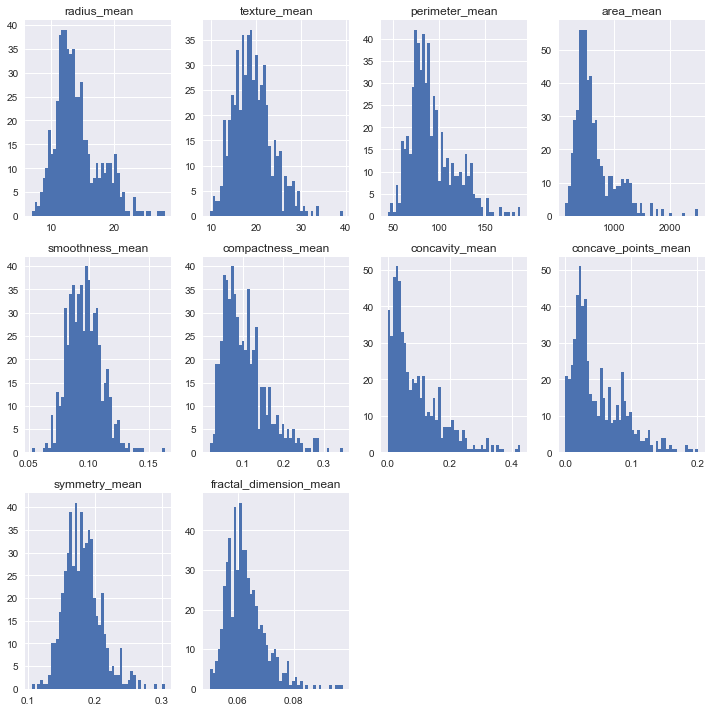

In [7]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(3,4,1)
_ = ax1.hist(df['radius_mean'], bins=50)
ax1.set_title('radius_mean')
ax2 = fig.add_subplot(3,4,2)
_ = ax2.hist(df['texture_mean'], bins=50)
ax2.set_title('texture_mean')
ax3 = fig.add_subplot(3,4,3)
_ = ax3.hist(df['perimeter_mean'], bins=50)
ax3.set_title('perimeter_mean')
ax4 = fig.add_subplot(3,4,4)
_ = ax4.hist(df['area_mean'], bins=50)
ax4.set_title('area_mean')
ax5 = fig.add_subplot(3,4,5)
_ = ax5.hist(df['smoothness_mean'], bins=50)
ax5.set_title('smoothness_mean')
ax6 = fig.add_subplot(3,4,6)
_ = ax6.hist(df['compactness_mean'], bins=50)
ax6.set_title('compactness_mean')
ax7 = fig.add_subplot(3,4,7)
_ = ax7.hist(df['concavity_mean'], bins=50)
ax7.set_title('concavity_mean')
ax8 = fig.add_subplot(3,4,8)
_ = ax8.hist(df['concave_points_mean'], bins=50)
ax8.set_title('concave_points_mean')
ax9 = fig.add_subplot(3,4,9)
_ = ax9.hist(df['symmetry_mean'], bins=50)
ax9.set_title('symmetry_mean')
ax10 = fig.add_subplot(3,4,10)
_ = ax10.hist(df['fractal_dimension_mean'], bins=50)
ax10.set_title('fractal_dimension_mean')
plt.tight_layout()

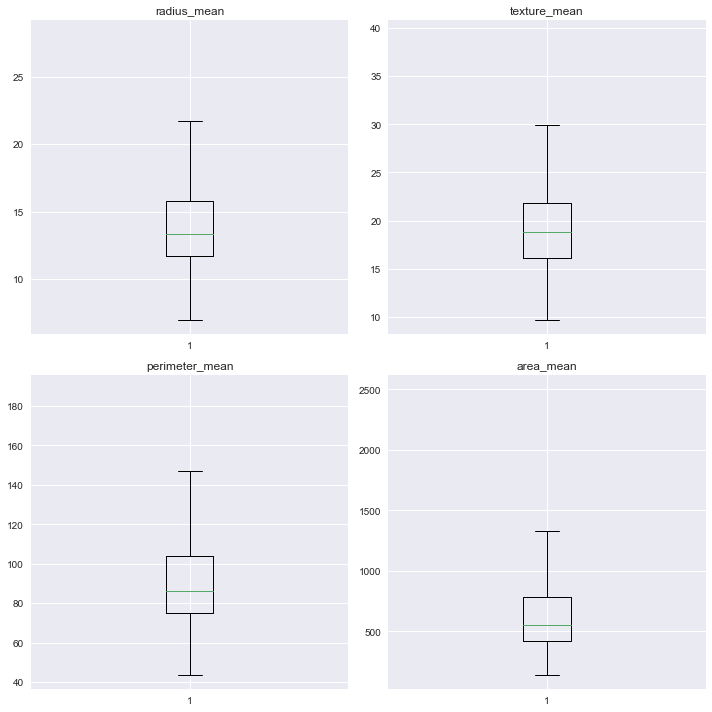

In [8]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(2,2,1)
_ = ax1.boxplot(df['radius_mean'])
ax1.set_title('radius_mean')
ax2 = fig.add_subplot(2,2,2)
_ = ax2.boxplot(df['texture_mean'])
ax2.set_title('texture_mean')
ax3 = fig.add_subplot(2,2,3)
_ = ax3.boxplot(df['perimeter_mean'])
ax3.set_title('perimeter_mean')
ax4 = fig.add_subplot(2,2,4)
_ = ax4.boxplot(df['area_mean'])
ax4.set_title('area_mean')
plt.tight_layout()

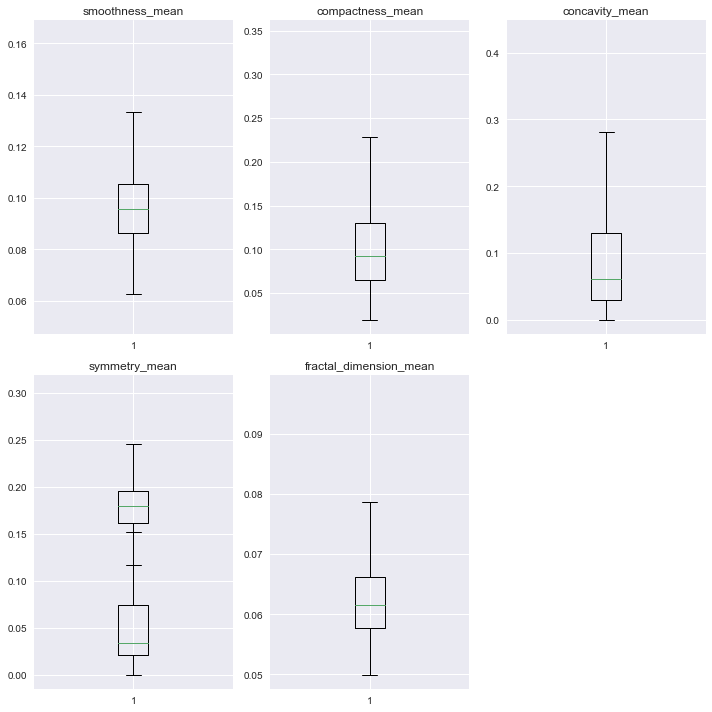

In [9]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax5 = fig.add_subplot(2,3,1)
_ = ax5.boxplot(df['smoothness_mean'])
ax5.set_title('smoothness_mean')
ax6 = fig.add_subplot(2,3,2)
_ = ax6.boxplot(df['compactness_mean'])
ax6.set_title('compactness_mean')
ax7 = fig.add_subplot(2,3,3)
_ = ax7.boxplot(df['concavity_mean'])
ax7.set_title('concavity_mean')
ax8 = fig.add_subplot(2,3,4)
_ = ax8.boxplot(df['concave_points_mean'])
ax8.set_title('concave_points_mean')
ax9 = fig.add_subplot(2,3,4)
_ = ax9.boxplot(df['symmetry_mean'])
ax9.set_title('symmetry_mean')
ax10 = fig.add_subplot(2,3,5)
_ = ax10.boxplot(df['fractal_dimension_mean'])
ax10.set_title('fractal_dimension_mean')
plt.tight_layout()

In [10]:
#Correlation Matrix...same as covariance matrix?
cols_to_keep = df.columns[2:12]
df_cols = df[cols_to_keep]
df_corr = df_cols.corr()
df_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Axes(0.125,0.125;0.62x0.755)


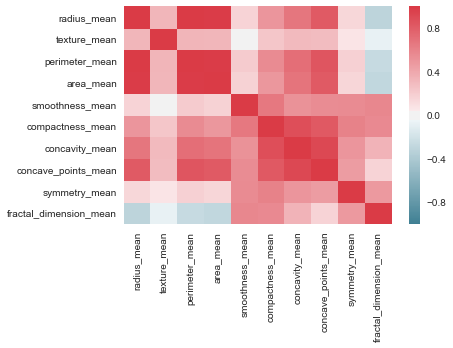

In [11]:
#Correlation heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print sns.heatmap(df_corr, cmap=cmap)

In [12]:
#group by target variable...count() may not be that informative, but can build on this.
df.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


In [13]:
#A targeted groupby is another approach.
df.groupby('diagnosis')[df.columns].count()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


In [14]:
#df.groupby(['diagnosis', 'radius_worst'])[['radius_worst']].count()
#df.groupby(['diagnosis', 'radius_mean'])[['radius_mean']].count()

In [15]:
#This will re-index the dataframe so that the ID is the index
cols_to_keep_2 = df.columns[0:12]
df_part = df[cols_to_keep_2]
df_part.set_index(['id'], inplace=True)
df_part.index.name=None #will figure out how to get back index name
#Change the diagnosis data from 'B' or 'M'; to 0 or 1
df_part.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
df_part.head()

C:\Users\danke_000\Anaconda3\envs\py2\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [16]:
print "Permutations for 3 itmes, 30 items:"
perm = (math.factorial(30)/math.factorial(27))
print perm

Permutations for 3 itmes, 30 items:
24360


In [17]:
df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)

In [18]:
#Logistic Regression fit and test
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import grid_search

C:\Users\danke_000\Anaconda3\envs\py2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\danke_000\Anaconda3\envs\py2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [19]:
#This is for feature extraction for Random Forest Feature Extraction
col_names = df.columns
end_col = col_names[-2]
col_names = col_names[2:-2]
formula_huge = 'diagnosis ~ '
for name in col_names:
    formula_huge += name + ' + '
formula_huge += end_col

y_6, x_6 = patsy.dmatrices(formula_huge, df, return_type='dataframe')
y_6 = df['diagnosis']
train_x_6, test_x_6, train_y_6, test_y_6 = train_test_split(x_6, y_6, train_size=0.75)

NameError: name 'patsy' is not defined

In [ ]:
#Random Forrest (uses train set fot fit and test set for predict) - Feature Selection
print "Random Forrest results:"
rnd_frst_big = RandomForestClassifier(n_estimators = 500)
rf_model_big = rnd_frst_big.fit(train_x_6, train_y_6)
score_rf_big = rf_model_big.score(train_x_6, train_y_6)
rf_pred_big = rf_model_big.predict(test_x_6)
score_rf_big_pred = rf_model_big.score(test_x_6, test_y_6)
print "score of fit: " + str(score_rf_big)
print "score of prediction: " + str(score_rf_big_pred)

In [ ]:
#Feature importance random forest
rf_cols_big = []
for col in x_6.columns:
    rf_cols_big.append(col + '_rf_big')
#rf_cols = rf_cols[1:]

rf_big_feature_importances = rf_model_big.feature_importances_
features_df_big = pd.DataFrame({'Features_set_6': rf_cols_big, 'rf_big_Importance Score': rf_big_feature_importances})
features_df_big.sort_values('rf_big_Importance Score', inplace=True, ascending=False)
print "Feature Importance:"
features_df_big.head()

In [ ]:
#Create verious patsy formulas and set up some train/test sets based 1 from the feature selection phase,
# 1 chosen at random, and one set the authors found to work well.

import patsy
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

#Feature set 1 - These are the top 5 from the random forrest that was run on the entire feature set
formula_1 = 'diagnosis ~ perimeter_worst + concave_points_mean + concave_points_worst + area_worst + radius_worst'
y_1, x_1 = patsy.dmatrices(formula_1, df, return_type='dataframe')
y_1 = y_1.values.ravel()
train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(x_1, y_1, train_size=0.75)

#Feature set 2 - Chosen at random 
formula_2 = 'diagnosis ~ radius_mean + texture_mean + perimeter_mean'
y_2, x_2 = patsy.dmatrices(formula_2, df, return_type='dataframe')
y_2 = y_2.values.ravel()
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(x_2, y_2, train_size=0.75)

#Feature set 3 - This is the feature combination found by the authors to work the best
formula_gold = 'diagnosis ~ area_worst + smoothness_worst + texture_mean'
y_3, x_3 = patsy.dmatrices(formula_gold, df, return_type='dataframe')
y_3 = df['diagnosis']
train_x_3, test_x_3, train_y_3, test_y_3 = train_test_split(x_3, y_3, train_size=0.75)

#--------------------------------------------------------------------------------------------#
#Feature set 1 - These are the top 5 from the random forrest that was run on the entire feature set
#Features need to be scaled for logistic regression. Below are the same 3 feature sets but scalled prior to splitting.
ss = StandardScaler()
#Create temp df to hold target values
df_y_temp = df['diagnosis']
#Created a dataframe for the patsy. First it only has the features, which will be scaled.
col_list_x1_ss = ['perimeter_worst','concave_points_mean', 'concave_points_worst', 'area_worst', 'radius_worst']
df_ss_set_1 = df[col_list_x1_ss]
#Scaling performed at the dataframe level. Numpy, scikit, and pandas all trying to work together
df_ss_set_1[col_list_x1_ss] = ss.fit_transform(df_ss_set_1[col_list_x1_ss])
#add the target variables to the dataframe for the patsy.
df_ss_set_1['diagnosis'] = df_y1_temp
formula_1 = 'diagnosis ~ perimeter_worst + concave_points_mean + concave_points_worst + area_worst + radius_worst'
y_1_ss, x_1_ss = patsy.dmatrices(formula_1, df_ss_set_1, return_type='dataframe')
y_1_ss = y_1_ss.values.ravel()
train_x_1_ss, test_x_1_ss, train_y_1_ss, test_y_1_ss = train_test_split(x_1_ss, y_1_ss, train_size=0.75)


#Feature set 2 - Chosen at random 
#Create temp df to hold target values
df_y_temp = df['diagnosis']
col_list_x2_ss = ['radius_mean', 'texture_mean', 'perimeter_mean']
df_ss_set_2 = df[col_list_x2_ss]
#Scaling performed at the dataframe level. Numpy, scikit, and pandas all trying to work together
df_ss_set_2[col_list_x2_ss] = ss.fit_transform(df_ss_set_2[col_list_x2_ss])
#add the target variables to the dataframe for the patsy.
df_ss_set_2['diagnosis'] = df_y_temp
formula_2 = 'diagnosis ~ radius_mean + texture_mean + perimeter_mean'
y_2_ss, x_2_ss = patsy.dmatrices(formula_2, df_ss_set_2, return_type='dataframe')
y_2_ss = y_2_ss.values.ravel()
train_x_2_ss, test_x_2_ss, train_y_2_ss, test_y_2_ss = train_test_split(x_2_ss, y_2_ss, train_size=0.75)


#Feature set 3 - This is the feature combination found by the authors to work the best
#Create temp df to hold target values
df_y_temp = df['diagnosis']
col_list_x3_ss = ['area_worst', 'smoothness_worst', 'texture_mean']
df_ss_set_3 = df[col_list_x3_ss]
#Scaling performed at the dataframe level. Numpy, scikit, and pandas all trying to work together
df_ss_set_3[col_list_x3_ss] = ss.fit_transform(df_ss_set_3[col_list_x3_ss])
#add the target variables to the dataframe for the patsy.
df_ss_set_3['diagnosis'] = df_y_temp
formula_gold = 'diagnosis ~ area_worst + smoothness_worst + texture_mean'
y_3_ss, x_3_ss = patsy.dmatrices(formula_gold, df_ss_set_3, return_type='dataframe')
y_3_ss = y_3_ss.values.ravel()
train_x_3_ss, test_x_3_ss, train_y_3_ss, test_y_3_ss = train_test_split(x_3_ss, y_3_ss, train_size=0.75)



In [ ]:
#Histograms, boxplots, amd violin plots: Feature set 1
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(13)
ax1 = fig.add_subplot(5,3,1)
_ = ax1.hist(df['perimeter_worst'], bins=50)
ax1.set_title('Feature Set 1: perimeter_worst')

ax2 = fig.add_subplot(5,3,2)
_ = ax2.boxplot(df['perimeter_worst'])
ax2.set_title('Feature Set 1: perimeter_worst')

ax3 = fig.add_subplot(5,3,3)
_ = ax3.violinplot(df['perimeter_worst'], showmeans=False, showmedians=True)
ax3.set_title('Feature Set 1: perimeter_worst')

ax4 = fig.add_subplot(5,3,4)
_ = ax4.hist(df['concave_points_mean'], bins=50)
ax4.set_title('Feature Set 1: concave_points_mean')

ax5 = fig.add_subplot(5,3,5)
_ = ax5.boxplot(df['concave_points_mean'])
ax5.set_title('Feature Set 1: concave_points_mean')

ax6 = fig.add_subplot(5,3,6)
_ = ax6.violinplot(df['concave_points_mean'], showmeans=False, showmedians=True)
ax6.set_title('Feature Set 1: concave_points_mean')

ax7 = fig.add_subplot(5,3,7)
_ = ax7.hist(df['concave_points_worst'], bins=50)
ax7.set_title('Feature Set 1: concave_points_worst')

ax8 = fig.add_subplot(5,3,8)
_ = ax8.boxplot(df['concave_points_worst'])
ax8.set_title('Feature Set 1: concave_points_worst')

ax9 = fig.add_subplot(5,3,9)
_ = ax9.violinplot(df['concave_points_worst'], showmeans=False, showmedians=True)
ax9.set_title('Feature Set 1: concave_points_worst')

ax10 = fig.add_subplot(5,3,10)
_ = ax10.hist(df['area_worst'], bins=50)
ax10.set_title('Feature Set 1: area_worst')

ax11 = fig.add_subplot(5,3,11)
_ = ax11.boxplot(df['area_worst'])
ax11.set_title('Feature Set 1: area_worst')

ax12 = fig.add_subplot(5,3,12)
_ = ax12.violinplot(df['area_worst'], showmeans=False, showmedians=True)
ax12.set_title('Feature Set 1: area_worst')

ax13 = fig.add_subplot(5,3,13)
_ = ax13.hist(df['radius_worst'], bins=50)
ax13.set_title('Feature Set 1: radius_worst')

ax14 = fig.add_subplot(5,3,14)
_ = ax14.boxplot(df['radius_worst'])
ax14.set_title('Feature Set 1: radius_worst')

ax15 = fig.add_subplot(5,3,15)
_ = ax15.boxplot(df['radius_worst'])
ax15.set_title('Feature Set 1: radius_worst')

plt.tight_layout()

In [ ]:
#Histograms, boxplots, amd violin plots: Feature set 1 (scaled for logit)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(13)
ax1 = fig.add_subplot(5,3,1)
_ = ax1.hist(df_ss_set_1['perimeter_worst'], bins=50)
ax1.set_title('Feature Set 1 (scaled for logit): perimeter_worst')

ax2 = fig.add_subplot(5,3,2)
_ = ax2.boxplot(df_ss_set_1['perimeter_worst'])
ax2.set_title('Feature Set 1 (scaled for logit): perimeter_worst')

ax3 = fig.add_subplot(5,3,3)
_ = ax3.violinplot(df_ss_set_1['perimeter_worst'], showmeans=False, showmedians=True)
ax3.set_title('Feature Set 1 (scaled for logit): perimeter_worst')

ax4 = fig.add_subplot(5,3,4)
_ = ax4.hist(df_ss_set_1['concave_points_mean'], bins=50)
ax4.set_title('Feature Set 1 (scaled for logit): concave_points_mean')

ax5 = fig.add_subplot(5,3,5)
_ = ax5.boxplot(df_ss_set_1['concave_points_mean'])
ax5.set_title('Feature Set 1 (scaled for logit): concave_points_mean')

ax6 = fig.add_subplot(5,3,6)
_ = ax6.violinplot(df_ss_set_1['concave_points_mean'], showmeans=False, showmedians=True)
ax6.set_title('Feature Set 1 (scaled for logit): concave_points_mean')

ax7 = fig.add_subplot(5,3,7)
_ = ax7.hist(df_ss_set_1['concave_points_worst'], bins=50)
ax7.set_title('Feature Set 1 (scaled for logit): concave_points_worst')

ax8 = fig.add_subplot(5,3,8)
_ = ax8.boxplot(df_ss_set_1['concave_points_worst'])
ax8.set_title('Feature Set 1 (scaled for logit): concave_points_worst')

ax9 = fig.add_subplot(5,3,9)
_ = ax9.violinplot(df_ss_set_1['concave_points_worst'], showmeans=False, showmedians=True)
ax9.set_title('Feature Set 1 (scaled for logit): concave_points_worst')

ax10 = fig.add_subplot(5,3,10)
_ = ax10.hist(df_ss_set_1['area_worst'], bins=50)
ax10.set_title('Feature Set 1 (scaled for logit): area_worst')

ax11 = fig.add_subplot(5,3,11)
_ = ax11.boxplot(df_ss_set_1['area_worst'])
ax11.set_title('Feature Set 1 (scaled for logit): area_worst')

ax12 = fig.add_subplot(5,3,12)
_ = ax12.violinplot(df_ss_set_1['area_worst'], showmeans=False, showmedians=True)
ax12.set_title('Feature Set 1 (scaled for logit): area_worst')

ax13 = fig.add_subplot(5,3,13)
_ = ax13.hist(df_ss_set_1['radius_worst'], bins=50)
ax13.set_title('Feature Set 1 (scaled for logit): radius_worst')

ax14 = fig.add_subplot(5,3,14)
_ = ax14.boxplot(df_ss_set_1['radius_worst'])
ax14.set_title('Feature Set 1 (scaled for logit): radius_worst')

ax15 = fig.add_subplot(5,3,15)
_ = ax15.boxplot(df_ss_set_1['radius_worst'])
ax15.set_title('Feature Set 1 (scaled for logit): radius_worst')

plt.tight_layout()

In [ ]:
#Histograms, boxplots, amd violin plots: Feature set 2
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax1 = fig.add_subplot(3,3,1)
_ = ax1.hist(df['radius_mean'], bins=50)
ax1.set_title('Feature Set 2: radius_mean')

ax2 = fig.add_subplot(3,3,2)
_ = ax2.boxplot(df['radius_mean'])
ax2.set_title('Feature Set 2: radius_mean')

ax3 = fig.add_subplot(3,3,3)
_ = ax3.violinplot(df['radius_mean'], showmeans=False, showmedians=True)
ax3.set_title('Feature Set 2: radius_mean')

ax4 = fig.add_subplot(3,3,4)
_ = ax4.hist(df['texture_mean'], bins=50)
ax4.set_title('Feature Set 2: texture_mean')

ax5 = fig.add_subplot(3,3,5)
_ = ax5.boxplot(df['texture_mean'])
ax5.set_title('Feature Set 2: texture_mean')

ax6 = fig.add_subplot(3,3,6)
_ = ax6.violinplot(df['texture_mean'], showmeans=False, showmedians=True)
ax6.set_title('Feature Set 2: texture_mean')

ax7 = fig.add_subplot(3,3,7)
_ = ax7.hist(df['perimeter_mean'], bins=50)
ax7.set_title('Feature Set 2: perimeter_mean')

ax8 = fig.add_subplot(3,3,8)
_ = ax8.boxplot(df['perimeter_mean'])
ax8.set_title('Feature Set 2: perimeter_mean')

ax9 = fig.add_subplot(3,3,9)
_ = ax9.violinplot(df['perimeter_mean'], showmeans=False, showmedians=True)
ax9.set_title('Feature Set 2: perimeter_mean')

plt.tight_layout()


In [ ]:
#Histograms, boxplots, amd violin plots: Feature set 2 (scaled for logit)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax1 = fig.add_subplot(3,3,1)
_ = ax1.hist(df_ss_set_2['radius_mean'], bins=50)
ax1.set_title('Feature Set 2 (scaled for logit): radius_mean')

ax2 = fig.add_subplot(3,3,2)
_ = ax2.boxplot(df_ss_set_2['radius_mean'])
ax2.set_title('Feature Set 2 (scaled for logit): radius_mean')

ax3 = fig.add_subplot(3,3,3)
_ = ax3.violinplot(df_ss_set_2['radius_mean'], showmeans=False, showmedians=True)
ax3.set_title('Feature Set 2 (scaled for logit): radius_mean')

ax4 = fig.add_subplot(3,3,4)
_ = ax4.hist(df_ss_set_2['texture_mean'], bins=50)
ax4.set_title('Feature Set 2 (scaled for logit): texture_mean')

ax5 = fig.add_subplot(3,3,5)
_ = ax5.boxplot(df_ss_set_2['texture_mean'])
ax5.set_title('Feature Set 2 (scaled for logit): texture_mean')

ax6 = fig.add_subplot(3,3,6)
_ = ax6.violinplot(df_ss_set_2['texture_mean'], showmeans=False, showmedians=True)
ax6.set_title('Feature Set 2 (scaled for logit): texture_mean')

ax7 = fig.add_subplot(3,3,7)
_ = ax7.hist(df_ss_set_2['perimeter_mean'], bins=50)
ax7.set_title('Feature Set 2 (scaled for logit): perimeter_mean')

ax8 = fig.add_subplot(3,3,8)
_ = ax8.boxplot(df_ss_set_2['perimeter_mean'])
ax8.set_title('Feature Set 2 (scaled for logit): perimeter_mean')

ax9 = fig.add_subplot(3,3,9)
_ = ax9.violinplot(df_ss_set_2['perimeter_mean'], showmeans=False, showmedians=True)
ax9.set_title('Feature Set 2 (scaled for logit): perimeter_mean')

plt.tight_layout()


In [ ]:
#Histograms, boxplots, amd violin plots: Feature set 3
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax1 = fig.add_subplot(3,3,1)
_ = ax1.hist(df['area_worst'], bins=50)
ax1.set_title('Feature Set 3: area_worst')

ax2 = fig.add_subplot(3,3,2)
_ = ax2.boxplot(df['area_worst'])
ax2.set_title('Feature Set 3: area_worst')

ax3 = fig.add_subplot(3,3,3)
_ = ax3.violinplot(df['area_worst'], showmeans=False, showmedians=True)
ax3.set_title('Feature Set 3: area_worst')

ax4 = fig.add_subplot(3,3,4)
_ = ax4.hist(df['smoothness_worst'], bins=50)
ax4.set_title('Feature Set 3: smoothness_worst')

ax5 = fig.add_subplot(3,3,5)
_ = ax5.boxplot(df['smoothness_worst'])
ax5.set_title('Feature Set 3: smoothness_worst')

ax6 = fig.add_subplot(3,3,6)
_ = ax6.violinplot(df['smoothness_worst'], showmeans=False, showmedians=True)
ax6.set_title('Feature Set 3: smoothness_worst')

ax7 = fig.add_subplot(3,3,7)
_ = ax7.hist(df['texture_mean'], bins=50)
ax7.set_title('Feature Set 3: texture_mean')

ax8 = fig.add_subplot(3,3,8)
_ = ax8.boxplot(df['texture_mean'])
ax8.set_title('Feature Set 3: texture_mean')

ax9 = fig.add_subplot(3,3,9)
_ = ax9.violinplot(df['texture_mean'], showmeans=False, showmedians=True)
ax9.set_title('Feature Set 3: texture_mean')

plt.tight_layout()

In [ ]:
#Histograms, boxplots, amd violin plots: Feature set 3 (scaled for logit)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
ax1 = fig.add_subplot(3,3,1)
_ = ax1.hist(df_ss_set_3['area_worst'], bins=50)
ax1.set_title('Feature Set 3 (scaled for logit): area_worst')

ax2 = fig.add_subplot(3,3,2)
_ = ax2.boxplot(df_ss_set_3['area_worst'])
ax2.set_title('Feature Set 3 (scaled for logit): area_worst')

ax3 = fig.add_subplot(3,3,3)
_ = ax3.violinplot(df_ss_set_3['area_worst'], showmeans=False, showmedians=True)
ax3.set_title('Feature Set 3 (scaled for logit): area_worst')

ax4 = fig.add_subplot(3,3,4)
_ = ax4.hist(df_ss_set_3['smoothness_worst'], bins=50)
ax4.set_title('Feature Set 3 (scaled for logit): smoothness_worst')

ax5 = fig.add_subplot(3,3,5)
_ = ax5.boxplot(df_ss_set_3['smoothness_worst'])
ax5.set_title('Feature Set 3 (scaled for logit): smoothness_worst')

ax6 = fig.add_subplot(3,3,6)
_ = ax6.violinplot(df_ss_set_3['smoothness_worst'], showmeans=False, showmedians=True)
ax6.set_title('Feature Set 3 (scaled for logit): smoothness_worst')

ax7 = fig.add_subplot(3,3,7)
_ = ax7.hist(df_ss_set_3['texture_mean'], bins=50)
ax7.set_title('Feature Set 3 (scaled for logit): texture_mean')

ax8 = fig.add_subplot(3,3,8)
_ = ax8.boxplot(df_ss_set_3['texture_mean'])
ax8.set_title('Feature Set 3 (scaled for logit): texture_mean')

ax9 = fig.add_subplot(3,3,9)
_ = ax9.violinplot(df_ss_set_3['texture_mean'], showmeans=False, showmedians=True)
ax9.set_title('Feature Set 3 (scaled for logit): texture_mean')

plt.tight_layout()

In [ ]:
#This function runs a grid search. The function parameters are the algorithm, features, target, and hyperparameters.
def explore_model(params, model, X, y):
    gs = grid_search.GridSearchCV(
        estimator=model,
        cv=5,
        param_grid=params,
        scoring='roc_auc',
        )
    gs.fit(X,y)
    return gs

In [ ]:
#These functions run the model fit, model prediction, and cross-validaiton check.
#Functions used in order to reduce typing and errors.

#Using the training data, score the model fit
def func_model_fit(model, x_train, y_train):
    model_fit = model.fit(x_train, y_train)
    fit_score = model_fit.score(x_train, y_train)
    return fit_score

#Using the training and test data, score the prediction
def func_model_pred(model, x_train, y_train, x_test, y_test):
    model_fit = model.fit(x_train, y_train)
    model_pred = model_fit.predict(x_test)
    pred_score = model_fit.score(x_test, y_test)
    return pred_score

#Using the training data and full set of data, run a cross validation    
def func_cv_check(model, x_train, y_train, x_full, y_full):
    model_fit = model.fit(x_train, y_train)
    mod_scores = cross_val_score(model_fit, x_full, y_full, scoring='roc_auc', cv=5)
    return mod_scores


Run a logistic regression, knn, and random forrest, with the hope of demonstrating the best algorithm. For each algorithm, 1) run a grid search 2) run fit, predict, and cross validaiton on the algorithm with the hyperparameters determined from the grid search, 3) classification report 4) feature importance evaluation. 

In [ ]:
#Logistic Regression Model Exploration
lr_model_gs = LogisticRegression()
lr_params = {"C":[0.1, 0.2, 0.4], 'penalty':['l1','l2']} 

In [ ]:
#Feature Set 1
#Logistic Regression Model Exploration for feature set 1
logit_explore_1 = explore_model(lr_params, lr_model_gs, x_1_ss, y_1_ss)

print "Logistic Regression Model Exploration"
print "best gs score:"
print logit_explore_1.best_score_
print ""
print "best gs params:"
print logit_explore_1.best_params_


In [ ]:
#Logistic Regression Model Exploration for feature set 2
logit_explore_2 = explore_model(lr_params, lr_model_gs, x_2_ss, y_2_ss)
print "Logistic Regression Model Exploration"
print "best gs score:"
print logit_explore_2.best_score_
print ""
print "best gs params:"
print logit_explore_2.best_params_

In [ ]:
#Logistic Regression Model Exploration for feature set 3
logit_explore_3 = explore_model(lr_params, lr_model_gs, x_3_ss, y_3_ss)
print "Logistic Regression Model Exploration"
print "best gs score:"
print logit_explore_3.best_score_
print ""
print "best gs params:"
print logit_explore_3.best_params_

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#Logistic Regression for feature set 1 (uses train set fot fit and test set for predict)
logreg_set_1 = LogisticRegression(penalty='l2', C=0.4)

print "Logistic Regression results:"
print "score of fit: " + str(func_model_fit(logreg_set_1, train_x_1_ss, train_y_1_ss))
print "score of prediction: " + str(func_model_pred(logreg_set_1, train_x_1_ss, train_y_1_ss, test_x_1_ss, test_y_1_ss))
#Cross Validation of the Logistic Regression (uses entire feature and training set)
print ""
print "Logistic Regression Cross validation results:"
cv_check_results_lr_1 = func_cv_check(logreg_set_1, train_x_1_ss, train_y_1_ss, x_1_ss, y_1_ss)
print('CV AUC_1 {}, Average AUC_1 {}'.format(cv_check_results_lr_1, cv_check_results_lr_1.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#Logistic Regression for feature set 2 (uses train set fot fit and test set for predict)
logreg_set_2 = LogisticRegression(penalty='l2', C=0.4)

print "Logistic Regression results:"
print "score of fit: " + str(func_model_fit(logreg_set_2, train_x_2_ss, train_y_2_ss))
print "score of prediction: " + str(func_model_pred(logreg_set_2, train_x_2_ss, train_y_2_ss, test_x_2_ss, test_y_2_ss))
#Cross Validation of the Logistic Regression (uses entire feature set and training set)
print ""
print "Logistic Regression Cross validation results:"
cv_check_results_lr_2 = func_cv_check(logreg_set_2, train_x_2_ss, train_y_2_ss, x_2_ss, y_2_ss)
print('CV AUC_1 {}, Average AUC_1 {}'.format(cv_check_results_lr_2, cv_check_results_lr_2.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#Logistic Regression for feature set 3 (uses train set fot fit and test set for predict)
logreg_set_3 = LogisticRegression(penalty='l1', C=0.4)

print "Logistic Regression results:"
print "score of fit: " + str(func_model_fit(logreg_set_3, train_x_3_ss, train_y_3_ss))
print "score of prediction: " + str(func_model_pred(logreg_set_3, train_x_3_ss, train_y_3_ss, test_x_3_ss, test_y_3_ss))
#Cross Validation of the Logistic Regression (uses entire feature set and training set)
print ""
print "Logistic Regression Cross validation results:"
cv_check_results_lr_3 = func_cv_check(logreg_set_3, train_x_3_ss, train_y_3_ss, x_3_ss, y_3_ss)
print('CV AUC_3 {}, Average AUC_3 {}'.format(cv_check_results_lr_3, cv_check_results_lr_3.mean()))

In [ ]:
#Dictionary for Dataframe that will be used for the chart for logistis regression on feature set 1
#makes use of the score functions from above
dct_plot_lr_1 = {}
dct_plot_lr_1['best_logit_1'] = logit_explore_1.best_score_
score_lr_m1 = func_model_fit(logreg_set_1, train_x_1_ss, train_y_1_ss)
dct_plot_lr_1['logit_fit_1'] = score_lr_m1
score_lr_m1_pred = func_model_pred(logreg_set_1, train_x_1_ss, train_y_1_ss, test_x_1_ss, test_y_1_ss)
dct_plot_lr_1['logit_pred_1'] = score_lr_m1_pred
dct_plot_lr_1['logit_cross_val_1'] = cv_check_results_lr_1.mean()

ser_for_plot_lr_1 = pd.Series(dct_plot_lr_1, index=dct_plot_lr_1.keys())
ser_for_plot_lr_1 = ser_for_plot_lr_1.reindex(['best_logit_1', 'logit_fit_1', 'logit_pred_1', 'logit_cross_val_1'])
'''
fig, axes = plt.subplots(1,1)
ser_for_plot_lr_1.plot(kind='bar', ax=axes, color='r', alpha=0.7, title='Feature Set 1', ylim=[0.80, 1.0])
'''
#Dictionary for Dataframe that will be used for the chart for logistis regression on feature set 2
dct_plot_lr_2 = {}
lst_df_set_2 =[]
dct_plot_lr_2['best_logit_2'] = logit_explore_2.best_score_
score_lr_m1 = func_model_fit(logreg_set_2, train_x_2_ss, train_y_2_ss)
dct_plot_lr_2['logit_fit_2'] = score_lr_m2
score_lr_m2_pred = func_model_pred(logreg_set_2, train_x_2_ss, train_y_2_ss, test_x_2_ss, test_y_2_ss)
dct_plot_lr_2['logit_pred_2'] = score_lr_m2_pred
dct_plot_lr_2['logit_cross_val_2'] = cv_check_results_lr_2.mean()


ser_for_plot_lr_2 = pd.Series(dct_plot_lr_2, index=dct_plot_lr_2.keys())
ser_for_plot_lr_2 = ser_for_plot_lr_2.reindex(['best_logit_2', 'logit_fit_2', 'logit_pred_2', 'logit_cross_val_2'])
'''
fig, axes = plt.subplots(1,1)
ser_for_plot_lr_2.plot(kind='bar', ax=axes, color='g', alpha=0.7, title='Feature Set 2', ylim=[0.80, 1.0])
'''
#Dictionary for Dataframe that will be used for the chart for logistis regression on feature set 3
dct_plot_lr_3 = {}
lst_df_set_3 =[]
dct_plot_lr_3['best_logit_3'] = logit_explore_3.best_score_
score_lr_m3 = func_model_fit(logreg_set_3, train_x_3_ss, train_y_3_ss)
dct_plot_lr_3['logit_fit_3'] = score_lr_m3
score_lr_m3_pred = func_model_pred(logreg_set_3, train_x_3_ss, train_y_3_ss, test_x_3_ss, test_y_3_ss)
dct_plot_lr_3['logit_pred_3'] = score_lr_m3_pred
dct_plot_lr_3['logit_cross_val_3'] = cv_check_results_lr_3.mean()


ser_for_plot_lr_3 = pd.Series(dct_plot_lr_3, index=dct_plot_lr_3.keys())
ser_for_plot_lr_3 = ser_for_plot_lr_3.reindex(['best_logit_3', 'logit_fit_3', 'logit_pred_3', 'logit_cross_val_3'])
'''
fig, axes = plt.subplots(1,1)
ser_for_plot_lr_3.plot(kind='bar', ax=axes, color='y', alpha=0.7, title='Feature Set 3', ylim=[0.80, 1.0])
'''


In [ ]:
#build list for DataFrame for plot; feature set 1
lst_df_lr_set_1 =[]
lst_df_lr_set_1.append(logit_explore_1.best_score_)
lst_df_lr_set_1.append(score_lr_m1)
lst_df_lr_set_1.append(score_lr_m1_pred)
lst_df_lr_set_1.append(cv_check_results_lr_1.mean())
#build list for DataFrame for plot; feature set 2
lst_df_lr_set_2 =[]
lst_df_lr_set_2.append(logit_explore_2.best_score_)
lst_df_lr_set_2.append(score_lr_m2)
lst_df_lr_set_2.append(score_lr_m2_pred)
lst_df_lr_set_2.append(cv_check_results_lr_2.mean())
#build list for DataFrame for plot; feature set 2
lst_df_lr_set_3 =[]
lst_df_lr_set_3.append(logit_explore_3.best_score_)
lst_df_lr_set_3.append(score_lr_m3)
lst_df_lr_set_3.append(score_lr_m3_pred)
lst_df_lr_set_3.append(cv_check_results_lr_3.mean())
#Build df for plot
dct_for_lr_df = {'feature set 1: Randorm Forest Feature Selection': lst_df_lr_set_1,'feature set 2: Chosen at Random': lst_df_lr_set_2, 'feature set 3: Author Chosen Features': lst_df_lr_set_3}
df_for_lr_plot = pd.DataFrame(dct_for_lr_df, index=['Grid Search', 'Training Fit', 'Test Prediction', 'Mean of Cross Val'])
df_for_lr_plot.columns.name = 'modeling results'
#Plot the Data Frame for Logistic Regression
fig, axes = plt.subplots(1,1)
df_for_lr_plot.plot(kind='bar', ax=axes, alpha=0.7, title='Logistic Regression Results', ylim=[0.85, 1.05], rot=45)
plt.legend(bbox_to_anchor=(0,1), loc=2, borderaxespad=0.)

In [ ]:
#Generalized Feature Ranking function. It is dependent on the type pf algorithm (not all algorithems have coef_)

def func_feature_rank_logit(x_full, model_fit, str_tag, out_tag, str_alg):
    lr_cols = []
    for col in x_full.columns:
        lr_cols.append(col + str_tag)
    lr_feature_importances = model_fit.coef_
    elem_1 = lr_feature_importances[0]
    df_out = pd.DataFrame({'Features_set': lr_cols, 'Importance Score': elem_1})
    df_out.sort_values('Importance Score', inplace=True, ascending=False)
    df_out.set_index(['Features_set'], inplace=True)
    print "Feature " + out_tag + " Ranking " + str_alg 
    return df_out

In [ ]:
#Feature Set 1 Ranking
lr_fitted_set_1 = logreg_set_1.fit(train_x_1_ss, train_y_1_ss)
df_curr_lr_1 = func_feature_rank_logit(x_1, lr_fitted_set_1, '_f1', 'set 1', 'logit')
df_curr_lr_1.columns.name = 'Feature Set 1'
df_curr_lr_1

In [ ]:
lr_fitted_set_2 = logreg_set_2.fit(train_x_2_ss, train_y_2_ss)
df_curr_lr_2 = func_feature_rank_logit(x_2, lr_fitted_set_2, '_f2', 'set_2', 'logit')
df_curr_lr_2.columns.name = 'Feature Set 2'
df_curr_lr_2

In [ ]:
lr_fitted_set_3 = logreg_set_3.fit(train_x_3_ss, train_y_3_ss)
df_curr_lr_3 = func_feature_rank_logit(x_3, lr_fitted_set_3, '_f3', 'set_3', 'logit')
df_curr_lr_3.columns.name = 'Feature Set 3'
df_curr_lr_3

In [ ]:
#Using the training and test data, score the prediction (this will be passed to the confusion matrix)
def func_model_pred_conf(model, x_train, y_train, x_test):
    model_fit = model.fit(x_train, y_train)
    model_pred = model_fit.predict(x_test)
    return model_pred

In [ ]:
#Put confusion matrix values into dictionary and return a series
#Pass in a pre-calculated confusion matrix
def func_cm_to_series(c_matrix):
    dct_c_matrix = {}
    dct_c_matrix['true_positive'] = c_matrix[0,0]
    dct_c_matrix['false_positive'] = c_matrix[0,1]
    dct_c_matrix['false_negative'] = c_matrix[1,0]
    dct_c_matrix['true_negative'] = c_matrix[1,1]
    ser_conf = pd.Series(dct_c_matrix, index=dct_c_matrix.keys())
    ser_conf = ser_conf.reindex(['true_positive', 'false_positive', 'false_negative', 'true_negative'])
    return ser_conf

In [ ]:
#Put confusion matrix calculations into dictionary and convert to series for plotting
#Pass in target set (for length calculation) and pre-calculated confusion matrix
def func_c_matrix_calc(test_y, c_matrix):
    dct_c_matrix_calc = {}
    num_test = len(test_y)
    t_pos = float(c_matrix[0,0])
    f_pos = float(c_matrix[0,1])
    f_neg = float(c_matrix[1,0])
    t_neg = float(c_matrix[1,1])
    dct_c_matrix_calc['accuracy'] = ((t_pos + t_neg)/num_test)
    dct_c_matrix_calc['misclass'] = ((f_pos + f_neg)/num_test)
    dct_c_matrix_calc['precision'] = (t_pos / (t_pos + f_pos))
    dct_c_matrix_calc['recall'] = (t_pos / (t_pos + f_neg))
    ser_c_matrix_calc = pd.Series(dct_c_matrix_calc, index=dct_c_matrix_calc.keys())
    ser_c_matrix_calc = ser_c_matrix_calc.reindex(['accuracy', 'misclass', 'precision', 'recall'])
    return ser_c_matrix_calc

In [ ]:
#Two functions to handle the confusion matirx calculations- one to make a cm, the other to calculate and return a df
def mini_cm(c_matrix):
    t_pos = float(c_matrix[0,0])
    f_pos = float(c_matrix[0,1])
    f_neg = float(c_matrix[1,0])
    t_neg = float(c_matrix[1,1])
    lst_out = [t_pos, f_pos, f_neg, t_neg]
    return lst_out

def mini_cm_calc(test_y, cm_list):
    num_test = len(test_y)
    t_pos = cm_list[0]
    f_pos = cm_list[1]
    f_neg = cm_list[2]
    t_neg = cm_list[3]
    accuracy = ((t_pos + t_neg)/num_test)
    misclass = ((f_pos + f_neg)/num_test)
    precision = (t_pos / (t_pos + f_pos))
    recall = (t_pos / (t_pos + f_neg))
    lst_out = [accuracy, misclass, precision, recall]
    return lst_out

def func_cm_calc_to_df(test_y_1, c_matrix_1, test_y_2, c_matrix_2, test_y_3, c_matrix_3, lst_index, lst_cols):
    lst_cm_1 = mini_cm(c_matrix_1)
    lst_cm_calc_1 = mini_cm_calc(test_y_1, lst_cm_1)
    lst_cm_2 = mini_cm(c_matrix_2)
    lst_cm_calc_2 = mini_cm_calc(test_y_2, lst_cm_2)
    lst_cm_3 = mini_cm(c_matrix_3)
    lst_cm_calc_3 = mini_cm_calc(test_y_3, lst_cm_3)
    dct_for_df_out = {lst_cols[0]:lst_cm_calc_1, lst_cols[1]:lst_cm_calc_2, lst_cols[2]:lst_cm_calc_3}
    df_out = pd.DataFrame(dct_for_df_out, index=lst_index)
    df_out.columns.name = 'Confusion Matrix Calculations'
    return df_out

In [ ]:
#Function out puts a dataframe built from three different confusion matrices and a list of column names
def func_cm_to_df(c_matrix_1, c_matrix_2, c_matrix_3, lst_index, lst_cols):
    lst_for_df_1 = [c_matrix_1[0,0], c_matrix_1[0,1], c_matrix_1[1,0], c_matrix_1[1,1]]
    lst_for_df_2 = [c_matrix_2[0,0], c_matrix_2[0,1], c_matrix_2[1,0], c_matrix_2[1,1]]
    lst_for_df_3 = [c_matrix_3[0,0], c_matrix_3[0,1], c_matrix_3[1,0], c_matrix_3[1,1]]
    dct_for_df = {lst_cols[0]:lst_for_df_1, lst_cols[1]:lst_for_df_2, lst_cols[2]:lst_for_df_3}
    df_out = pd.DataFrame(dct_for_df, index=lst_index)
    df_out.columns.name = 'Confusion Matirx'
    return df_out

In [ ]:
#Logistic Regression Confusion Matrix Results
#Critical to pass labels to the confusion matrix so that it gives the right results
#feature set 1
lr_model_pred_set_1 = func_model_pred_conf(logreg_set_1, train_x_1_ss, train_y_1_ss, test_x_1_ss)
conf_mat_lr_1 = confusion_matrix(test_y_1_ss, lr_model_pred_set_1, labels=[1,0])
#feature set 2
lr_model_pred_set_2 = func_model_pred_conf(logreg_set_2, train_x_2_ss, train_y_2_ss, test_x_2_ss)
conf_mat_lr_2 = confusion_matrix(test_y_2_ss, lr_model_pred_set_2, labels=[1,0])
#feature set 3
lr_model_pred_set_3 = func_model_pred_conf(logreg_set_3, train_x_3_ss, train_y_3_ss, test_x_3_ss)
conf_mat_lr_3 = confusion_matrix(test_y_3_ss, lr_model_pred_set_3, labels=[1,0])
#Build the df
lst_index = ['true_positive', 'false_positive', 'false_negative', 'true_negative']
lst_index_calc = ['accuracy', 'misclass', 'precision', 'recall']
lst_cols = ['Feature Set 1', 'Feature Set 2', 'Feature Set 3']
df_for_lr_cm_plot = func_cm_to_df(conf_mat_lr_1, conf_mat_lr_2, conf_mat_lr_3, lst_index, lst_cols)
df_for_lr_cm_calc_plot = func_cm_calc_to_df(test_y_1, conf_mat_lr_1, test_y_2, conf_mat_lr_2, test_y_3, conf_mat_lr_3, lst_index_calc, lst_cols)


In [ ]:
df_for_cm_plot

In [ ]:
df_for_cm_calc_plot

In [ ]:
#KNN Model Exploration
kn_model_gs = KNeighborsClassifier()
kn_params = {"n_neighbors":[2,3,4,5,6], "weights":['uniform', 'distance'], "metric":['euclidean','minkowski']}

In [ ]:
#K-Nearest Neighbors Model Exploration: feature set 1
knn_explore_1 = explore_model(kn_params, kn_model_gs, x_1, y_1)
print "K-Nearest Neighbors Model Exploration"
print "best gs params:"
print knn_explore_1.best_score_
print ""
print "best gs params:"
print knn_explore_1.best_params_

In [ ]:
#K-Nearest Neighbors Model Exploration: feature set 2
knn_explore_2 = explore_model(kn_params, kn_model_gs, x_2, y_2)
print "K-Nearest Neighbors Model Exploration"
print "best gs params:"
print knn_explore_2.best_score_
print ""
print "best gs params:"
print knn_explore_2.best_params_

In [ ]:
#K-Nearest Neighbors Model Exploration: feature set 3
knn_explore_3 = explore_model(kn_params, kn_model_gs, x_3, y_3)
print "K-Nearest Neighbors Model Exploration"
print "best gs params:"
print knn_explore_3.best_score_
print ""
print "best gs params:"
print knn_explore_3.best_params_

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#KNN for feature set 1 (uses train set fot fit and test set for predict)
knn_set_1 = KNeighborsClassifier(n_neighbors=6, metric='euclidean', weights='uniform')

print "K-Nearest Neighbors results:"
print "score of fit: " + str(func_model_fit(knn_set_1, train_x_1, train_y_1))
print "score of prediction: " + str(func_model_pred(knn_set_1, train_x_1, train_y_1, test_x_1, test_y_1))
#Cross Validation of the K-Nearest Neighbors (uses entire feature and training set)
print ""
print "K-Nearest Neighbors Cross validation results:"
cv_check_results_knn_1 = func_cv_check(knn_set_1, train_x_1, train_y_1, x_1, y_1)
print('CV AUC_1 {}, Average AUC_1 {}'.format(cv_check_results, cv_check_results_knn_1.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#KNN for feature set 1 (uses train set fot fit and test set for predict)
knn_set_1 = KNeighborsClassifier(n_neighbors=6, metric='euclidean', weights='uniform')

print "K-Nearest Neighbors results:"
print "score of fit: " + str(func_model_fit(knn_set_1, train_x_1, train_y_1))
print "score of prediction: " + str(func_model_pred(knn_set_1, train_x_1, train_y_1, test_x_1, test_y_1))
#Cross Validation of the K-Nearest Neighbors (uses entire feature and training set)
print ""
print "K-Nearest Neighbors Cross validation results:"
cv_check_results_knn_1 = func_cv_check(knn_set_1, train_x_1, train_y_1, x_1, y_1)
print('CV AUC_1 {}, Average AUC_1 {}'.format(cv_check_results_knn_1, cv_check_results_knn_1.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#KNN for feature set 2 (uses train set fot fit and test set for predict)
knn_set_2 = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')

print "K-Nearest Neighbors results:"
print "score of fit: " + str(func_model_fit(knn_set_2, train_x_2, train_y_2))
print "score of prediction: " + str(func_model_pred(knn_set_2, train_x_2, train_y_2, test_x_2, test_y_2))
#Cross Validation of the K-Nearest Neighbors (uses entire feature and training set)
print ""
print "K-Nearest Neighbors Cross validation results:"
cv_check_results_knn_2 = func_cv_check(knn_set_2, train_x_2, train_y_2, x_2, y_2)
print('CV AUC_2 {}, Average AUC_2 {}'.format(cv_check_results_knn_2, cv_check_results_knn_2.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#KNN for feature set 3 (uses train set fot fit and test set for predict)
knn_set_3 = KNeighborsClassifier(n_neighbors=6, metric='euclidean', weights='distance')

print "K-Nearest Neighbors results:"
print "score of fit: " + str(func_model_fit(knn_set_3, train_x_3, train_y_3))
print "score of prediction: " + str(func_model_pred(knn_set_3, train_x_3, train_y_3, test_x_3, test_y_3))
#Cross Validation of the K-Nearest Neighbors (uses entire feature and training set)
print ""
print "K-Nearest Neighbors Cross validation results:"
cv_check_results_knn_3 = func_cv_check(knn_set_3, train_x_3, train_y_3, x_3, y_3)
print('CV AUC_3 {}, Average AUC_3 {}'.format(cv_check_results_knn_3, cv_check_results_knn_3.mean()))

In [ ]:
#Dictionary for Dataframe that will be used for the chart for KNN on feature set 1
#makes use of the score functions from above
dct_plot_knn_1 = {}
dct_plot_knn_1['best_knn_1'] = knn_explore_1.best_score_
score_knn_m1 = func_model_fit(knn_set_1, train_x_1, train_y_1)
dct_plot_knn_1['knn_fit_1'] = score_knn_m1
score_knn_m1_pred = func_model_pred(knn_set_1, train_x_1, train_y_1, test_x_1, test_y_1)
dct_plot_knn_1['knn_pred_1'] = score_knn_m1_pred
dct_plot_knn_1['knn_cross_val_1'] = cv_check_results_knn_1.mean()

ser_for_plot_knn_1 = pd.Series(dct_plot_knn_1, index=dct_plot_knn_1.keys())
ser_for_plot_knn_1 = ser_for_plot_knn_1.reindex(['best_knn_1', 'knn_fit_1', 'knn_pred_1', 'knn_cross_val_1'])
#ser_for_plot_lr_1.plot(kind= 'bar')

#Dictionary for Dataframe that will be used for the chart for KNN on feature set 2
dct_plot_knn_2 = {}
dct_plot_knn_2['best_knn_2'] = knn_explore_2.best_score_
score_knn_m2 = func_model_fit(knn_set_2, train_x_2, train_y_2)
dct_plot_knn_2['knn_fit_2'] = score_knn_m2
score_knn_m2_pred = func_model_pred(knn_set_2, train_x_2, train_y_2, test_x_2, test_y_2)
dct_plot_knn_2['knn_pred_2'] = score_knn_m2_pred
dct_plot_knn_2['knn_cross_val_2'] = cv_check_results_knn_2.mean()

ser_for_plot_knn_2 = pd.Series(dct_plot_knn_2, index=dct_plot_knn_2.keys())
ser_for_plot_knn_2 = ser_for_plot_knn_2.reindex(['best_knn_2', 'knn_fit_2', 'knn_pred_2', 'knn_cross_val_2'])
#ser_for_plot_lr_2.plot(kind= 'bar')

#Dictionary for Dataframe that will be used for the chart for KNN on feature set 3
dct_plot_knn_3 = {}
dct_plot_knn_3['best_knn_3'] = knn_explore_3.best_score_
score_knn_m3 = func_model_fit(knn_set_3, train_x_3, train_y_3)
dct_plot_knn_3['knn_fit_3'] = score_knn_m3
score_knn_m3_pred = func_model_pred(knn_set_3, train_x_3, train_y_3, test_x_3, test_y_3)
dct_plot_knn_3['knn_pred_3'] = score_knn_m3_pred
dct_plot_knn_3['knn_cross_val_3'] = cv_check_results_knn_3.mean()

ser_for_plot_knn_3 = pd.Series(dct_plot_knn_3, index=dct_plot_knn_3.keys())
ser_for_plot_knn_3 = ser_for_plot_knn_3.reindex(['best_knn_3', 'knn_fit_3', 'knn_pred_3', 'knn_cross_val_3'])
#ser_for_plot_lr_3.plot(kind= 'bar')

In [ ]:
#build list for DataFrame for plot; feature set 1
lst_df_kn_set_1 =[]
lst_df_kn_set_1.append(knn_explore_1.best_score_)
lst_df_kn_set_1.append(score_knn_m1)
lst_df_kn_set_1.append(score_knn_m1_pred)
lst_df_kn_set_1.append(cv_check_results_knn_1.mean())
#build list for DataFrame for plot; feature set 2
lst_df_kn_set_2 =[]
lst_df_kn_set_2.append(knn_explore_2.best_score_)
lst_df_kn_set_2.append(score_knn_m2)
lst_df_kn_set_2.append(score_knn_m2_pred)
lst_df_kn_set_2.append(cv_check_results_knn_2.mean())
#build list for DataFrame for plot; feature set 2
lst_df_kn_set_3 =[]
lst_df_kn_set_3.append(logit_explore_3.best_score_)
lst_df_kn_set_3.append(score_knn_m3)
lst_df_kn_set_3.append(score_knn_m3_pred)
lst_df_kn_set_3.append(cv_check_results_knn_3.mean())
#Build df for plot
dct_for_kn_df = {'feature set 1: Random Forest Feature Selection': lst_df_kn_set_1,'feature set 2: Chosen at Random': lst_df_kn_set_2, 'feature set 3: Author Chosen Features': lst_df_kn_set_3}
df_for_kn_plot = pd.DataFrame(dct_for_kn_df, index=['Grid Search', 'Training Fit', 'Test Prediction', 'Mean of Cross Val'])
df_for_kn_plot.columns.name = 'modeling results'
#Plot the Data Frame for Logistic Regression
fig, axes = plt.subplots(1,1)
df_for_kn_plot.plot(kind='bar', ax=axes, alpha=0.7, title='K-Nearest Neighbors Results', ylim=[0.85, 1.05], rot=45)
plt.legend(bbox_to_anchor=(0,1), loc=2, borderaxespad=0.)

In [ ]:
#K-Nearest Neighbors Confusion Matrix Results
#Critical to pass labels to the confusion matrix so that it gives the right results
#feature set 1
knn_model_pred_set_1 = func_model_pred_conf(knn_set_1, train_x_1, train_y_1, test_x_1)
conf_mat_knn_1 = confusion_matrix(test_y_1, knn_model_pred_set_1, labels=[1,0])
#feature set 2
knn_model_pred_set_2 = func_model_pred_conf(knn_set_2, train_x_2, train_y_2, test_x_2)
conf_mat_knn_2 = confusion_matrix(test_y_2, knn_model_pred_set_2, labels=[1,0])
#feature set 3
knn_model_pred_set_3 = func_model_pred_conf(knn_set_3, train_x_3, train_y_3, test_x_3)
conf_mat_knn_3 = confusion_matrix(test_y_3, knn_model_pred_set_3, labels=[1,0])

In [ ]:
#Logistic Regression Confusion Matrix Results
#Critical to pass labels to the confusion matrix so that it gives the right results
#feature set 1
knn_model_pred_set_1 = func_model_pred_conf(knn_set_1, train_x_1, train_y_1, test_x_1)
conf_mat_knn_1 = confusion_matrix(test_y_1, knn_model_pred_set_1, labels=[1,0])
#feature set 2
knn_model_pred_set_2 = func_model_pred_conf(knn_set_2, train_x_2, train_y_2, test_x_2)
conf_mat_knn_2 = confusion_matrix(test_y_2, knn_model_pred_set_2, labels=[1,0])
#feature set 3
knn_model_pred_set_3 = func_model_pred_conf(knn_set_3, train_x_3, train_y_3, test_x_3)
conf_mat_knn_3 = confusion_matrix(test_y_3, knn_model_pred_set_3, labels=[1,0])
#Build the df
lst_index = ['true_positive', 'false_positive', 'false_negative', 'true_negative']
lst_index_calc = ['accuracy', 'misclass', 'precision', 'recall']
lst_cols = ['Feature Set 1', 'Feature Set 2', 'Feature Set 3']
df_for_knn_cm_plot = func_cm_to_df(conf_mat_knn_1, conf_mat_knn_2, conf_mat_knn_3, lst_index, lst_cols)
df_for_knn_cm_calc_plot = func_cm_calc_to_df(test_y_1, conf_mat_knn_1, test_y_2, conf_mat_knn_2, test_y_3, conf_mat_knn_3, lst_index_calc, lst_cols)


In [ ]:
df_for_knn_cm_plot

In [ ]:
df_for_knn_cm_calc_plot

In [ ]:
#Random Forrest Model Exploration
rf_model_gs = RandomForestClassifier()
rf_params = {"n_estimators":[10,50,100,500], 'max_depth':[3,4,5,6,7,8]}

In [ ]:
#Random Forrest Model Exploration: feature set 1
rnd_frst_explore_1 = explore_model(rf_params, rf_model_gs, x_1, y_1)
print "Random ForrestNeighbors Model Exploration"
print "best gs params:"
print rnd_frst_explore_1.best_score_
print ""
print "best gs params: "
print rnd_frst_explore_1.best_params_

In [ ]:
#Random Forrest Model Exploration: feature set 2
rnd_frst_explore_2 = explore_model(rf_params, rf_model_gs, x_2, y_2)
print "Random ForrestNeighbors Model Exploration"
print "best gs params:"
print rnd_frst_explore_2.best_score_
print ""
print "best gs params: "
print rnd_frst_explore_2.best_params_

In [ ]:
#Random Forrest Model Exploration: feature set 3
rnd_frst_explore_3 = explore_model(rf_params, rf_model_gs, x_3, y_3)
print "Random ForrestNeighbors Model Exploration"
print "best gs params:"
print rnd_frst_explore_3.best_score_
print ""
print "best gs params: "
print rnd_frst_explore_3.best_params_

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#Random Forrest for feature set 1 (uses train set fot fit and test set for predict)
rnd_frst_set_1 = RandomForestClassifier(n_estimators=100, max_depth=3)

print "Random Forrest results:"
print "score of fit: " + str(func_model_fit(rnd_frst_set_1, train_x_1, train_y_1))
print "score of prediction: " + str(func_model_pred(rnd_frst_set_1, train_x_1, train_y_1, test_x_1, test_y_1))
#Cross Validation of the Random Forres (uses entire feature and training set)
print ""
print "Random Forres Cross validation results:"
cv_check_results_rf_1 = func_cv_check(rnd_frst_set_1, train_x_1, train_y_1, x_1, y_1)
print('CV AUC_1 {}, Average AUC_1 {}'.format(cv_check_results_rf_1, cv_check_results_rf_1.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#Random Forrest for feature set 2 (uses train set fot fit and test set for predict)
rnd_frst_set_2 = RandomForestClassifier(n_estimators=500, max_depth=7)

print "Random Forrest results:"
print "score of fit: " + str(func_model_fit(rnd_frst_set_2, train_x_2, train_y_2))
print "score of prediction: " + str(func_model_pred(rnd_frst_set_2, train_x_2, train_y_2, test_x_2, test_y_2))
#Cross Validation of the Random Forres (uses entire feature and training set)
print ""
print "Random Forres Cross validation results:"
cv_check_results_rf_2 = func_cv_check(rnd_frst_set_2, train_x_2, train_y_2, x_2, y_2)
print('CV AUC_2 {}, Average AUC_2 {}'.format(cv_check_results_rf_2, cv_check_results_rf_2.mean()))

In [ ]:
#Algorithm uses hyperparameters determined in GridSearch
#Random Forrest for feature set 3 (uses train set fot fit and test set for predict)
rnd_frst_set_3 = RandomForestClassifier(n_estimators=50, max_depth=5)

print "Random Forrest results:"
print "score of fit: " + str(func_model_fit(rnd_frst_set_3, train_x_3, train_y_3))
print "score of prediction: " + str(func_model_pred(rnd_frst_set_3, train_x_3, train_y_3, test_x_3, test_y_3))
#Cross Validation of the Random Forres (uses entire feature and training set)
print ""
print "Random Forres Cross validation results:"
cv_check_results_rf_3 = func_cv_check(rnd_frst_set_3, train_x_3, train_y_3, x_3, y_3)
print('CV AUC_3 {}, Average AUC_3 {}'.format(cv_check_results_rf_3, cv_check_results_rf_3.mean()))

In [ ]:
#Dictionary for Dataframe that will be used for the chart for Random Forrest on feature set 1
#makes use of the score functions from above
dct_plot_rnd_frst_1 = {}
dct_plot_rnd_frst_1['best_rnd_frst_1'] = rnd_frst_explore_1.best_score_
score_rnd_frst_m1 = func_model_fit(rnd_frst_set_1, train_x_1, train_y_1)
dct_plot_rnd_frst_1['rnd_frst_fit_1'] = score_rnd_frst_m1
score_rnd_frst_m1_pred = func_model_pred(rnd_frst_set_1, train_x_1, train_y_1, test_x_1, test_y_1)
dct_plot_rnd_frst_1['rnd_frst_pred_1'] = score_rnd_frst_m1_pred
dct_plot_rnd_frst_1['rnd_frst_cross_val_1'] = cv_check_results_rf_1.mean()

ser_for_plot_rnd_frst_1 = pd.Series(dct_plot_rnd_frst_1, index=dct_plot_rnd_frst_1.keys())
ser_for_plot_rnd_frst_1 = ser_for_plot_rnd_frst_1.reindex(['best_rnd_frst_1', 'rnd_frst_fit_1', 'rnd_frst_pred_1', 'rnd_frst_cross_val_1'])
#ser_for_plot_lr_1.plot(kind= 'bar')

#Dictionary for Dataframe that will be used for the chart for Random Forrest on feature set 2
dct_plot_rnd_frst_2 = {}
dct_plot_rnd_frst_2['best_rnd_frst_2'] = rnd_frst_explore_2.best_score_
score_rnd_frst_m2 = func_model_fit(rnd_frst_set_2, train_x_2, train_y_2)
dct_plot_rnd_frst_2['rnd_frst_fit_2'] = score_rnd_frst_m2
score_rnd_frst_m2_pred = func_model_pred(rnd_frst_set_2, train_x_2, train_y_2, test_x_2, test_y_2)
dct_plot_rnd_frst_2['rnd_frst_pred_2'] = score_rnd_frst_m2_pred
dct_plot_rnd_frst_2['rnd_frst_cross_val_2'] = cv_check_results_rf_2.mean()

ser_for_plot_rnd_frst_2 = pd.Series(dct_plot_rnd_frst_2, index=dct_plot_rnd_frst_2.keys())
ser_for_plot_rnd_frst_2 = ser_for_plot_rnd_frst_2.reindex(['best_rnd_frst_2', 'rnd_frst_fit_2', 'rnd_frst_pred_2', 'rnd_frst_cross_val_2'])
#ser_for_plot_lr_1.plot(kind= 'bar')

#Dictionary for Dataframe that will be used for the chart for Random Forrest on feature set 3
dct_plot_rnd_frst_3 = {}
dct_plot_rnd_frst_3['best_rnd_frst_3'] = rnd_frst_explore_3.best_score_
score_rnd_frst_m3 = func_model_fit(rnd_frst_set_3, train_x_3, train_y_3)
dct_plot_rnd_frst_3['rnd_frst_fit_3'] = score_rnd_frst_m3
score_rnd_frst_m3_pred = func_model_pred(rnd_frst_set_3, train_x_3, train_y_3, test_x_3, test_y_3)
dct_plot_rnd_frst_3['rnd_frst_pred_3'] = score_rnd_frst_m3_pred
dct_plot_rnd_frst_3['rnd_frst_cross_val_3'] = cv_check_results_rf_3.mean()

ser_for_plot_rnd_frst_3 = pd.Series(dct_plot_rnd_frst_3, index=dct_plot_rnd_frst_3.keys())
ser_for_plot_rnd_frst_3 = ser_for_plot_rnd_frst_3.reindex(['best_rnd_frst_3', 'rnd_frst_fit_3', 'rnd_frst_pred_3', 'rnd_frst_cross_val_3'])
#ser_for_plot_lr_3.plot(kind= 'bar')

In [ ]:
#build list for DataFrame for plot; feature set 1
lst_df_rnd_frst_set_1 =[]
lst_df_rnd_frst_set_1.append(rnd_frst_explore_1.best_score_)
lst_df_rnd_frst_set_1.append(score_rnd_frst_m1)
lst_df_rnd_frst_set_1.append(score_rnd_frst_m1_pred)
lst_df_rnd_frst_set_1.append(cv_check_results_rf_1.mean())
#build list for DataFrame for plot; feature set 2
lst_df_rnd_frst_set_2 =[]
lst_df_rnd_frst_set_2.append(rnd_frst_explore_2.best_score_)
lst_df_rnd_frst_set_2.append(score_rnd_frst_m2)
lst_df_rnd_frst_set_2.append(score_rnd_frst_m2_pred)
lst_df_rnd_frst_set_2.append(cv_check_results_rf_2.mean())
#build list for DataFrame for plot; feature set 2
lst_df_rnd_frst_set_3 =[]
lst_df_rnd_frst_set_3.append(rnd_frst_explore_3.best_score_)
lst_df_rnd_frst_set_3.append(score_rnd_frst_m3)
lst_df_rnd_frst_set_3.append(score_rnd_frst_m3_pred)
lst_df_rnd_frst_set_3.append(cv_check_results_rf_3.mean())
#Build df for plot
dct_for_rnd_frst_df = {'feature set 1: Random Forest Feature Selection': lst_df_rnd_frst_set_1,'feature set 2: Chosen at Random': lst_df_rnd_frst_set_2, 'feature set 3: Author Chosen Features': lst_df_rnd_frst_set_3}
df_for_rnd_frst_plot = pd.DataFrame(dct_for_rnd_frst_df, index=['Grid Search', 'Training Fit', 'Test Prediction', 'Mean of Cross Val'])
df_for_rnd_frst_plot.columns.name = 'modeling results'
#Plot the Data Frame for Logistic Regression
fig, axes = plt.subplots(1,1)
df_for_rnd_frst_plot.plot(kind='bar', ax=axes, alpha=0.7, title='Random Forrest Neighbors Results', ylim=[0.85, 1.05], rot=45)
plt.legend(bbox_to_anchor=(0,1), loc=2, borderaxespad=0.)

In [ ]:
#Generalized Feature Ranking function. It is dependent on the type pf algorithm (not all algorithems have coef_)

def func_feature_rank_rnd_frst(x_full, model_fit, str_tag, out_tag, str_alg):
    rf_cols = []
    for col in x_full.columns:
        rf_cols.append(col + str_tag)
    rf_feature_importances = model_fit.feature_importances_
    df_out = pd.DataFrame({'Features_set': rf_cols, 'Importance Score': rf_feature_importances})
    df_out.sort_values('Importance Score', inplace=True, ascending=False)
    df_out.set_index(['Features_set'], inplace=True)
    print "Feature " + out_tag + " Ranking " + str_alg 
    return df_out

In [ ]:
#Feature Set 1 Ranking
rf_fitted_set_1 = rnd_frst_set_1.fit(train_x_1, train_y_1)
df_curr_rf_1 = func_feature_rank_rnd_frst(x_1, rf_fitted_set_1, '_f1', 'set 1', 'random_forest')
df_curr_rf_1.columns.name = 'Feature Set 1'
df_curr_rf_1

In [ ]:
#Feature Set 2 Ranking
rf_fitted_set_2 = rnd_frst_set_2.fit(train_x_2, train_y_2)
df_curr_rf_2 = func_feature_rank_rnd_frst(x_2, rf_fitted_set_2, '_f2', 'set 2', 'random_forest')
df_curr_rf_2.columns.name = 'Feature Set 2'
df_curr_rf_2

In [ ]:
#Feature Set 3 Ranking
rf_fitted_set_3 = rnd_frst_set_3.fit(train_x_3, train_y_3)
df_curr_rf_3 = func_feature_rank_rnd_frst(x_3, rf_fitted_set_3, '_f3', 'set 3', 'random_forest')
df_curr_rf_3.columns.name = 'Feature Set 3'
df_curr_rf_3

In [ ]:
#Random Forrest Confusion Matrix Results
#Critical to pass labels to the confusion matrix so that it gives the right results
#feature set 1
rnd_frst_model_pred_set_1 = func_model_pred_conf(rnd_frst_set_1, train_x_1, train_y_1, test_x_1)
conf_mat_rnd_frst_1 = confusion_matrix(test_y_1, rnd_frst_model_pred_set_1, labels=[1,0])
#feature set 2
rnd_frst_model_pred_set_2 = func_model_pred_conf(rnd_frst_set_2, train_x_2, train_y_2, test_x_2)
conf_mat_rnd_frst_2 = confusion_matrix(test_y_2, rnd_frst_model_pred_set_2, labels=[1,0])
#feature set 3
rnd_frst_model_pred_set_3 = func_model_pred_conf(rnd_frst_set_3, train_x_3, train_y_3, test_x_3)
conf_mat_rnd_frst_3 = confusion_matrix(test_y_3, rnd_frst_model_pred_set_3, labels=[1,0])

In [ ]:
#Logistic Regression Confusion Matrix Results
#Critical to pass labels to the confusion matrix so that it gives the right results
#feature set 1
rnd_frst_model_pred_set_1 = func_model_pred_conf(rnd_frst_set_1, train_x_1, train_y_1, test_x_1)
conf_mat_rnd_frst_1 = confusion_matrix(test_y_1, rnd_frst_model_pred_set_1, labels=[1,0])
#feature set 2
rnd_frst_model_pred_set_2 = func_model_pred_conf(rnd_frst_set_2, train_x_2, train_y_2, test_x_2)
conf_mat_rnd_frst_2 = confusion_matrix(test_y_2, rnd_frst_model_pred_set_2, labels=[1,0])
#feature set 3
rnd_frst_model_pred_set_3 = func_model_pred_conf(rnd_frst_set_3, train_x_3, train_y_3, test_x_3)
conf_mat_rnd_frst_3 = confusion_matrix(test_y_3, rnd_frst_model_pred_set_3, labels=[1,0])
#Build the df
lst_index = ['true_positive', 'false_positive', 'false_negative', 'true_negative']
lst_index_calc = ['accuracy', 'misclass', 'precision', 'recall']
lst_cols = ['Feature Set 1', 'Feature Set 2', 'Feature Set 3']
df_for_rnd_frst_cm_plot = func_cm_to_df(conf_mat_rnd_frst_1, conf_mat_rnd_frst_2, conf_mat_rnd_frst_3, lst_index, lst_cols)
df_for_rnd_frst_cm_calc_plot = func_cm_calc_to_df(test_y_1, conf_mat_rnd_frst_1, test_y_2, conf_mat_rnd_frst_2, test_y_3, conf_mat_rnd_frst_3, lst_index_calc, lst_cols)


In [ ]:
df_for_rnd_frst_cm_plot 

In [ ]:
df_for_rnd_frst_cm_calc_plot

In [ ]:
ser_conf_rnd_frst_1 = func_cm_to_series(conf_mat_rnd_frst_1)
print "Confusion Matrix for Random Forest feature set 1"
ser_conf_rnd_frst_1

In [ ]:
ser_conf_calc_rnd_frst_1 = func_c_matrix_calc(test_y_1, conf_mat_rnd_frst_1)
print "Confusion Matrix calculations for Random Forest feature set 1"
ser_conf_calc_rnd_frst_1

In [ ]:
ser_conf_rnd_frst_2 = func_cm_to_series(conf_mat_rnd_frst_2)
print "Confusion Matrix for Random Forest feature set 2"
ser_conf_rnd_frst_2

In [ ]:
ser_conf_calc_rnd_frst_2 = func_c_matrix_calc(test_y_2, conf_mat_rnd_frst_2)
print "Confusion Matrix calculations for Random Forest feature set 2"
ser_conf_calc_rnd_frst_2

In [ ]:
ser_conf_rnd_frst_3 = func_cm_to_series(conf_mat_rnd_frst_3)
print "Confusion Matrix for Random Forest feature set 3"
ser_conf_rnd_frst_3

In [ ]:
ser_conf_calc_rnd_frst_3 = func_c_matrix_calc(test_y_3, conf_mat_rnd_frst_3)
print "Confusion Matrix calculations for Random Forest feature set 3"
ser_conf_calc_rnd_frst_3